# Preliminary Experiments with Existing Algorithms: Part 1, Pre-Processing

Preliminary experiment consists of three algorithms: learning fair representations (pre-processing), adversarial debiasing (in-processing), and calibrayed equalized odds (post-processing). In order to compare these algorithms, Adult census and German credit datasets will be used. Logistic regression classifier will be used to train and test the results

In [1]:
#importing the required libraries
import sys
sys.path.insert(1, "../")  
random.seed(0)
import numpy as np

#datasets
from aif360.datasets import AdultDataset, GermanDataset
#functions to pre-process datasets 
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult, load_preproc_data_german

#metrics
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector

#algorithm
from aif360.algorithms.preprocessing.lfr import LFR

#scalers & classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

#markdown and plotting
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

import warnings; warnings.simplefilter('ignore')

In [2]:
#importing the datassets

#Adult
adult_orig = load_preproc_data_adult()
adult_orig_train, adult_orig_test = adult_orig.split([0.7], shuffle=True)

a_privileged_groups = [{'sex': 1.0}]
a_unprivileged_groups = [{'sex': 0.0}]

#German credit
german_orig = GermanDataset(
    protected_attribute_names=['age'],          
    privileged_classes=[lambda x: x >= 25],
    # ignore sex-related attributes in order to focus on single binary sensitive attribute
    features_to_drop=['personal_status', 'sex']
)

german_orig.labels

array([[1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],

In [3]:
for i in range(1000):
    if (german_orig.labels[i] == 2.0):
        german_orig.labels[i] = 0
    else:
        german_orig.labels[i] = 1
        
german_orig.favorable_label = 1
german_orig.unfavorable_label = 0

g_privileged_groups = [{'age': 1}]
g_unprivileged_groups = [{'age': 0}]

german_orig_train, german_orig_test = german_orig.split([0.7], shuffle=True)

In [4]:
german_orig.labels

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

In [5]:
#It finda that German dataset has a class imbalance, 700 positive and 300 negative outcomes.
k=0
for i in range(1000):
    if(german_orig.labels[i] == 1):
        k+=1
    else:
        pass
print(k)

700


In [6]:
# some information of each dataset regarding labels, names, etc. 
display(Markdown("#### German Training Dataset shape"))
print(german_orig_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(german_orig_train.favorable_label, german_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(german_orig_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(german_orig_train.privileged_protected_attributes, 
      german_orig_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(german_orig_train.feature_names)

display(Markdown("#### Adult Training Dataset shape"))
print(adult_orig_train.features.shape)
display(Markdown("#### Favorable and unfavorable labels"))
print(adult_orig_train.favorable_label, adult_orig_train.unfavorable_label)
display(Markdown("#### Protected attribute names"))
print(adult_orig_train.protected_attribute_names)
display(Markdown("#### Privileged and unprivileged protected attribute values"))
print(adult_orig_train.privileged_protected_attributes, 
      adult_orig_train.unprivileged_protected_attributes)
display(Markdown("#### Dataset feature names"))
print(adult_orig_train.feature_names)

#### German Training Dataset shape

(700, 57)


#### Favorable and unfavorable labels

1 0


#### Protected attribute names

['age']


#### Privileged and unprivileged protected attribute values

[array([1.])] [array([0.])]


#### Dataset feature names

['month', 'credit_amount', 'investment_as_income_percentage', 'residence_since', 'age', 'number_of_credits', 'people_liable_for', 'status=A11', 'status=A12', 'status=A13', 'status=A14', 'credit_history=A30', 'credit_history=A31', 'credit_history=A32', 'credit_history=A33', 'credit_history=A34', 'purpose=A40', 'purpose=A41', 'purpose=A410', 'purpose=A42', 'purpose=A43', 'purpose=A44', 'purpose=A45', 'purpose=A46', 'purpose=A48', 'purpose=A49', 'savings=A61', 'savings=A62', 'savings=A63', 'savings=A64', 'savings=A65', 'employment=A71', 'employment=A72', 'employment=A73', 'employment=A74', 'employment=A75', 'other_debtors=A101', 'other_debtors=A102', 'other_debtors=A103', 'property=A121', 'property=A122', 'property=A123', 'property=A124', 'installment_plans=A141', 'installment_plans=A142', 'installment_plans=A143', 'housing=A151', 'housing=A152', 'housing=A153', 'skill_level=A171', 'skill_level=A172', 'skill_level=A173', 'skill_level=A174', 'telephone=A191', 'telephone=A192', 'foreign_wor

#### Adult Training Dataset shape

(34189, 18)


#### Favorable and unfavorable labels

1.0 0.0


#### Protected attribute names

['sex', 'race']


#### Privileged and unprivileged protected attribute values

[array([1.]), array([1.])] [array([0.]), array([0.])]


#### Dataset feature names

['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [7]:
german_orig_test

               instance weights features                \
                                                         
                                   month credit_amount   
instance names                                           
784                         1.0     20.0        6468.0   
986                         1.0     42.0        6289.0   
534                         1.0     24.0        3105.0   
706                         1.0     48.0        6560.0   
265                         1.0     15.0         802.0   
...                         ...      ...           ...   
462                         1.0     12.0        3017.0   
437                         1.0     24.0        1287.0   
990                         1.0     12.0        3565.0   
939                         1.0     24.0        6842.0   
221                         1.0     12.0        1200.0   

                                                                \
                                                               

In [8]:
german_orig_test.features

array([[2.000e+01, 6.468e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [4.200e+01, 6.289e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.400e+01, 3.105e+03, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.200e+01, 3.565e+03, 2.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.400e+01, 6.842e+03, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.200e+01, 1.200e+03, 4.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [9]:
# Initial disparities in the original datasets

#Adult
metric_ad_orig_train = BinaryLabelDatasetMetric(adult_orig_train, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)
display(Markdown("#### Adult original training dataset"))

print("Disparate impact (of original labels) between unprivileged and privileged groups = %f" % metric_ad_orig_train.disparate_impact())
print("Difference in statistical parity (of original labels) between unprivileged and privileged groups = %f" % metric_ad_orig_train.statistical_parity_difference())
print("Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = %f" % metric_ad_orig_train.consistency())

metric_ad_orig_test = BinaryLabelDatasetMetric(adult_orig_test, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)
display(Markdown("#### Adult original test dataset"))

print("Disparate impact (of original labels) between unprivileged and privileged groups = %f" % metric_ad_orig_test.disparate_impact())
print("Difference in statistical parity (of original labels) between unprivileged and privileged groups = %f" % metric_ad_orig_test.statistical_parity_difference())
print("Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = %f" % metric_ad_orig_test.consistency())

#------------------------------------------------------------------

#German
metric_ger_orig_train = BinaryLabelDatasetMetric(german_orig_train, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)
display(Markdown("#### German original training dataset"))

print("Disparate impact ratio (of original labels) between unprivileged and privileged groups = %f" % metric_ger_orig_train.disparate_impact())
print("Difference in statistical parity (of original labels) between unprivileged and privileged groups = %f" % metric_ger_orig_train.statistical_parity_difference())
print("Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = %f" % metric_ger_orig_train.consistency())

metric_ger_orig_test = BinaryLabelDatasetMetric(german_orig_test, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)
display(Markdown("#### German original test dataset"))

print("Disparate impact ratio (of original labels) between unprivileged and privileged groups = %f" % metric_ger_orig_test.disparate_impact())
print("Difference in statistical parity (of original labels) between unprivileged and privileged groups = %f" % metric_ger_orig_test.statistical_parity_difference())
print("Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = %f" % metric_ger_orig_test.consistency())

#n_neighbors warning exists due to how this individual metric is implemented in the library. The function has its own parameter n_neighbors=5

#### Adult original training dataset

Disparate impact (of original labels) between unprivileged and privileged groups = 0.360776
Difference in statistical parity (of original labels) between unprivileged and privileged groups = -0.194909
Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = 0.725216


#### Adult original test dataset

Disparate impact (of original labels) between unprivileged and privileged groups = 0.356944
Difference in statistical parity (of original labels) between unprivileged and privileged groups = -0.193624
Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = 0.723729


#### German original training dataset

Disparate impact ratio (of original labels) between unprivileged and privileged groups = 0.843577
Difference in statistical parity (of original labels) between unprivileged and privileged groups = -0.112943
Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = 0.681429


#### German original test dataset

Disparate impact ratio (of original labels) between unprivileged and privileged groups = 0.755583
Difference in statistical parity (of original labels) between unprivileged and privileged groups = -0.174182
Individual fairness metric from Zemel et.al. that measures how similar the labels are for similar instances = 0.670000


### Initial fairness performance of the predictions of a classifier without mitigation

In [10]:
#Scaling the dataset
scale_orig = StandardScaler()

#German
X_train_g = scale_orig.fit_transform(german_orig_train.features)
X_test_g = scale_orig.transform(german_orig_test.features)

y_train_g = german_orig_train.labels.ravel()
y_test_g = german_orig_test.labels.ravel()

#Adult
X_train_a = scale_orig.fit_transform(adult_orig_train.features)
X_test_a = scale_orig.transform(adult_orig_test.features)

y_train_a = adult_orig_train.labels.ravel()
y_test_a = adult_orig_test.labels.ravel()


#Logistic Regression Training for each dataset
log_reg_g = LogisticRegression() 
log_reg_a = LogisticRegression() 

#Fitting the German dataset
log_reg_g.fit(X_train_g, y_train_g)

#Fitting Adult dataset
log_reg_a.fit(X_train_a, y_train_a)

#Predicting test set labels
y_test_pred_g = log_reg_g.predict(X_test_g)
y_test_pred_proba_g = log_reg_g.predict_proba(X_test_g)

y_test_pred_a = log_reg_a.predict(X_test_a)
y_test_pred_proba_a = log_reg_a.predict_proba(X_test_a)


In [11]:
print(y_test_pred_g)

[1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.]


### Fairness Performance of the predicted labels

In [12]:
#1) German Dataset

display(Markdown("#### German Test Set Fairness Performance Results"))

#Create a new version of the test set with predicted class labels
g_testset_pred = german_orig_test.copy()
g_testset_pred.labels = y_test_pred_g

#Construction 1
#to construct this metric function, the predicted labels should be united with the test fetures to make a new datas
metric_ger_pred_test = BinaryLabelDatasetMetric(g_testset_pred, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)

#Construction 2
#both original test dataset with actual labels and the test dataset combined with predicted class labels need to be given to this function
classified_metric_g = ClassificationMetric(german_orig_test, 
                                                 g_testset_pred,
                                                 unprivileged_groups=g_unprivileged_groups,
                                                 privileged_groups=g_privileged_groups)


#Checking Equalized Odds: average odds differecence, which is the avg. of differences in FPR&TPR for privileged and unprivileged groups.
aeo_g = classified_metric_g.average_odds_difference()
print("Average equalized odds difference between unprivileged and privileged groups = %f" % aeo_g)

#Disparate Impact ratio between privileged and unprivileged groups.
di_g = classified_metric_g.disparate_impact()
print("Disparate impact ratio between unprivileged and privileged groups = %f" % di_g)

#Demographic parity difference between privileged and unprivileged groups.
spd_g = classified_metric_g.statistical_parity_difference()
print("Demographic parity difference between unprivileged and privileged groups = %f" % spd_g)

#Predictive parity difference: PPV difference between privileged and unprivileged groups.
ppd_g = classified_metric_g.positive_predictive_value(privileged=False) - classified_metric_g.positive_predictive_value(privileged=True)
print("Predictive Parity difference between unprivileged and privileged groups = %f" % ppd_g)

#Individual Fairness: 1)Consistency, 2) Euclidean Distance between individuals.
print("Consistency of indivuals' predicted labels = %f" % metric_ger_pred_test.consistency())



#2) Adult Dataset
display(Markdown("#### Adult Test Set Fairness Performance Results"))

a_testset_pred = adult_orig_test.copy()
a_testset_pred.labels = y_test_pred_a

#Construction 1
#to construct this metric function, the predicted labels should be united with the test fetures to make a new datas
metric_ad_pred_test = BinaryLabelDatasetMetric(a_testset_pred, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)


#Construction 2
#both original test dataset and the test dataset with predicted class labels need to be given to this function
classified_metric_a = ClassificationMetric(adult_orig_test, 
                                                 a_testset_pred,
                                                 unprivileged_groups=a_unprivileged_groups,
                                                 privileged_groups=a_privileged_groups)

#Checking Equalized Odds: average odds differecence, which is the avg. of differences in FPR&TPR for privileged and unprivileged groups.
aeo_a = classified_metric_a.average_odds_difference()
print("Average equalized odds difference between unprivileged and privileged groups = %f" % aeo_a)

#Disparate Impact ratio between privileged and unprivileged groups.
di_a = classified_metric_a.disparate_impact()
print("Disparate impact ratio between unprivileged and privileged groups = %f" % di_a)

#Demographic parity difference between privileged and unprivileged groups.
spd_a = classified_metric_a.statistical_parity_difference()
print("Demographic parity difference between unprivileged and privileged groups = %f" % spd_a)

#Predictive parity difference: PPV difference between privileged and unprivileged groups.
ppd_a = classified_metric_a.positive_predictive_value(privileged=False) - classified_metric_a.positive_predictive_value(privileged=True)
print("Predictive Parity difference between unprivileged and privileged groups = %f" % ppd_a)

#Individual Fairness: 1)Consistency, 2) Euclidean Distance between individuals.
print("Consistency of indivuals' predicted labels = %f" % metric_ad_pred_test.consistency())


#### German Test Set Fairness Performance Results

Average equalized odds difference between unprivileged and privileged groups = -0.106385
Disparate impact ratio between unprivileged and privileged groups = 0.702279
Demographic parity difference between unprivileged and privileged groups = -0.184792
Predictive Parity difference between unprivileged and privileged groups = -0.251271
Consistency of indivuals' predicted labels = 0.635333


#### Adult Test Set Fairness Performance Results

Average equalized odds difference between unprivileged and privileged groups = -0.338793
Disparate impact ratio between unprivileged and privileged groups = 0.261540
Demographic parity difference between unprivileged and privileged groups = -0.385316
Predictive Parity difference between unprivileged and privileged groups = -0.131045
Consistency of indivuals' predicted labels = 0.999113


### Classifier Performance Metrics Before Debiasing

In [13]:
#German

TPRg = classified_metric_g.true_positive_rate() #recall
TNRg = classified_metric_g.true_negative_rate() #specificity
PPVg = classified_metric_g.positive_predictive_value() #precision
bal_acc_g = (TPRg+TNRg)/2
f1_g = 2*((PPVg*TPRg)/(PPVg+TPRg))

display(Markdown("#### Classifier Prediction Performance on German Test Set"))
print("Standard accuracy of logistic regression trained on German dataset without any mitigation = %f" % classified_metric_g.accuracy())
print("Balanced accuracy of logistic regression trained on German dataset without any mitigation = %f" % bal_acc_g)
print("F1 score of logistic regression trained on German dataset without any mitigation = %f" % f1_g)

print("For german dataset")
print("Precision (PPV): %f" %PPVg)
print("Recall (TPR): %f" %TPRg)
print("Specificity (TNR): %f" %TNRg)
print("F1-score: %f" %f1_g)

#Adult

TPRa = classified_metric_a.true_positive_rate()
TNRa = classified_metric_a.true_negative_rate()
PPVa = classified_metric_a.positive_predictive_value()
bal_acc_a = (TPRa+TNRa)/2
f1_a = 2*((PPVa*TPRa)/(PPVa+TPRa))

display(Markdown("#### Classifier Prediction Performance on Adult Test Set "))
print("Standard accuracy of logistic regression trained on German dataset without any mitigation = %f" % classified_metric_a.accuracy())
print("Balanced accuracy of logistic regression trained on German dataset without any mitigation = %f" % bal_acc_a)
print("F1 score of logistic regression trained on German dataset without any mitigation = %f" % f1_a)

print("For adult dataset")
print("Precision: %f" %PPVa)
print("Recall: %f" %TPRa)
print("Specificity: %f" %TNRa)
print("F1-score: %f" %f1_a)


#### Classifier Prediction Performance on German Test Set

Standard accuracy of logistic regression trained on German dataset without any mitigation = 0.686667
Balanced accuracy of logistic regression trained on German dataset without any mitigation = 0.675238
F1 score of logistic regression trained on German dataset without any mitigation = 0.756477
For german dataset
Precision (PPV): 0.815642
Recall (TPR): 0.705314
Specificity (TNR): 0.645161
F1-score: 0.756477


#### Classifier Prediction Performance on Adult Test Set 

Standard accuracy of logistic regression trained on German dataset without any mitigation = 0.733979
Balanced accuracy of logistic regression trained on German dataset without any mitigation = 0.746853
F1 score of logistic regression trained on German dataset without any mitigation = 0.579141
For adult dataset
Precision: 0.463613
Recall: 0.771355
Specificity: 0.722351
F1-score: 0.579141


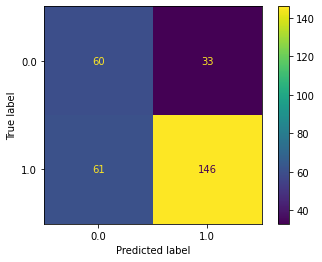

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_german = confusion_matrix(german_orig_test.labels, g_testset_pred.labels)

disp_german = ConfusionMatrixDisplay(confusion_matrix=cm_german,
                              display_labels=log_reg_g.classes_)
disp_german.plot()

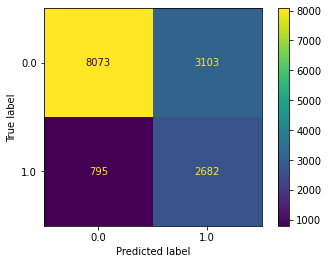

In [15]:
cm_adult = confusion_matrix(adult_orig_test.labels, a_testset_pred.labels)

disp_adult = ConfusionMatrixDisplay(confusion_matrix=cm_adult,
                              display_labels=log_reg_a.classes_)
disp_adult.plot()

## Implementation of the Mitigation Algorithms

### Pre-processing algorithm: Learning Fair Representations

In [16]:
#1) Transforming Adult Dataset

#Required Inputs:
# Input recontruction quality - Ax
# Fairness constraint - Az
# Output prediction error - Ay

#scaled dataset together with its labels is needed
adult_orig_train.features = scale_orig.fit_transform(adult_orig_train.features)
adult_orig_test.features = scale_orig.transform(adult_orig_test.features)

#LFR itself contains logistic regression sinc it uses signoid functions 
LFR_a =LFR(unprivileged_groups=a_unprivileged_groups,
         privileged_groups=a_privileged_groups,
         k=10, Ax=0.1, Ay=1.0, Az=2.0,
         verbose=1
        )
TR_a = LFR_a.fit(adult_orig_train, maxiter=5000, maxfun=5000)


# Transform training data and align features
a_transf_train = TR_a.transform(adult_orig_train)
a_transf_test = TR_a.transform(adult_orig_test)


250 83249.80707600791
500 70844.79385786862
750 70411.5738023804
1000 74264.36657282058
1250 70823.80844506534
1500 70187.05430589327
1750 69284.58697278144
2000 68633.965930703
2250 65995.8027816055
2500 66635.90214005698
2750 66424.35773091216
3000 66084.30807786873
3250 66172.92582256568
3500 65234.697085083775
3750 64760.020124962524
4000 64220.04649473905
4250 62563.67119761381
4500 61224.4880677521
4750 60130.43736764904
5000 59893.17098447331


In [17]:
#2) Transforming German Dataset

#scaled dataset together with its labels is needed
german_orig_train.features = scale_orig.fit_transform(german_orig_train.features)
german_orig_test.features = scale_orig.transform(german_orig_test.features)

#LFR itself contains logistic regression sinc it uses signoid functions 
LFR_g =LFR(unprivileged_groups=g_unprivileged_groups,
         privileged_groups=g_privileged_groups,
         k=10, Ax=0.1, Ay=1.0, Az=2.0,
         verbose=1
        )
TR_g = LFR_g.fit(german_orig_train, maxiter=5000, maxfun=5000)


# Transform training data and align features
g_transf_train = TR_g.transform(german_orig_train)
g_transf_test = TR_g.transform(german_orig_test)


5250 5252.815638453695
5500 5252.815909852896
5750 5252.815867000124
6000 4986.662390841265
6250 4986.662397301612
6500 4986.66241244289
6750 4619.244599182724
7000 4619.244915716556
7250 4619.244565912454
7500 4310.563506027777
7750 4310.563593020886
8000 4310.563504482912
8250 4307.407876128636
8500 4307.407888250555
8750 4253.468880404726
9000 4253.46887062803
9250 4253.468870933014
9500 4222.046326181713
9750 4222.046293215335
10000 4222.046333678051
10250 4166.814926985774
10500 4166.815136461748
10750 4166.8150181213


### Performance Evaluation of LFR algorithm

#### Fairness performance of the datasets before classification

In [18]:
#Fairness Performance of Datasets Before Classification

#Constucting two functions to call the desired metrics
#Adult
metric_transf_train_a = BinaryLabelDatasetMetric(a_transf_train, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)

display(Markdown("#### Transformed Adult train set"))
print("Disparate impact ratio (of transformed labels) between unprivileged and privileged groups = %f" % metric_transf_train_a.disparate_impact())
print("Difference in statistical parity (of transformed data) between unprivileged and privileged groups = %f" % metric_transf_train_a.statistical_parity_difference())
print("Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = %f" % metric_transf_train_a.consistency())


metric_transf_test_a = BinaryLabelDatasetMetric(a_transf_test, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)

display(Markdown("#### Transformed Adult test set"))
print("Disparate impact ratio (of transformed data) between unprivileged and privileged groups = %f" % metric_transf_test_a.disparate_impact())
print("Difference in statistical parity (of transformed data) between unprivileged and privileged groups = %f" %metric_transf_test_a.statistical_parity_difference())
print("Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = %f" % metric_transf_test_a.consistency())


#German
metric_transf_train_g = BinaryLabelDatasetMetric(g_transf_train, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)

display(Markdown("#### Transformed German train set"))
print("Disparate impact ratio (of transformed data) between unprivileged and privileged groups = %f" % metric_transf_train_g.disparate_impact())
print("Difference in statistical parity (of transformed data) between unprivileged and privileged groups = %f" % metric_transf_train_g.statistical_parity_difference())
print("Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = %f" % metric_transf_train_g.consistency())


metric_transf_test_g = BinaryLabelDatasetMetric(g_transf_test, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)

display(Markdown("#### Transformed German test set"))
print("Disparate impact ratio (of transformed data) between unprivileged and privileged groups = %f" % metric_transf_test_g.disparate_impact())
print("Difference in statistical parity (of transformed data) between unprivileged and privileged groups = %f" %metric_transf_test_g.statistical_parity_difference())
print("Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = %f" % metric_transf_test_g.consistency())


#### Transformed Adult train set

Disparate impact ratio (of transformed labels) between unprivileged and privileged groups = 0.531858
Difference in statistical parity (of transformed data) between unprivileged and privileged groups = -0.125024
Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = 1.000000


#### Transformed Adult test set

Disparate impact ratio (of transformed data) between unprivileged and privileged groups = 0.534977
Difference in statistical parity (of transformed data) between unprivileged and privileged groups = -0.118622
Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = 1.000000


#### Transformed German train set

Disparate impact ratio (of transformed data) between unprivileged and privileged groups = 0.725668
Difference in statistical parity (of transformed data) between unprivileged and privileged groups = -0.237134
Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = 0.990571


#### Transformed German test set

Disparate impact ratio (of transformed data) between unprivileged and privileged groups = 0.760490
Difference in statistical parity (of transformed data) between unprivileged and privileged groups = -0.201886
Individual fairness metric 'consistency' that measures how similar the labels are for similar instances = 0.982667


#### Fairness and predictive performance after classification

In [19]:
 g_transf_test.labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [20]:
german_orig_test.labels

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [21]:
#Fairness Performance of Predictions After Classification with Logistic Regression
#Note: this time scaling is not applied since the original datasets were already scaled before transformation.
#German
X_train_g_trans =g_transf_train.features
X_test_g_trans = g_transf_test.features

y_train_g_trans = g_transf_train.labels.ravel()
y_test_g_trans = g_transf_test.labels.ravel()

#Adult
X_train_a_trans = a_transf_train.features
X_test_a_trans = a_transf_test.features

y_train_a_trans = a_transf_train.labels.ravel()
y_test_a_trans = a_transf_test.labels.ravel()


#Logistic Regression Training for each dataset
trans_lr_g = LogisticRegression() 
trans_lr_a = LogisticRegression() 

#Fitting the German dataset
trans_lr_g.fit(X_train_g_trans, y_train_g_trans)

#Fitting Adult dataset
trans_lr_a.fit(X_train_a_trans, y_train_a_trans)

#Predicting test set labels
y_test_trans_pred_g = log_reg_g.predict(X_test_g_trans)
y_test_trans_pred_proba_g = log_reg_g.predict_proba(X_test_g_trans)

y_test_trans_pred_a = log_reg_a.predict(X_test_a_trans)
y_test_trans_pred_proba_a = log_reg_a.predict_proba(X_test_a_trans)


In [22]:
#Constructors to retrieve the results

#1) German Dataset

display(Markdown("#### German Transformed Test Set Fairness Performance (based on predictions)"))

#Create a new version of the transformed test set with predicted class labels
g_testset_pred_trans = g_transf_test.copy()
g_testset_pred_trans.labels = y_test_trans_pred_g

#Construction 1
#to construct this metric function, the predicted labels should be united with the test fetures to make a new datas
metric_ger_pred_trans_test = BinaryLabelDatasetMetric(g_testset_pred_trans, 
                                             unprivileged_groups=g_unprivileged_groups,
                                             privileged_groups=g_privileged_groups)

#Construction 2
'''both transformed test dataset with actual labels and the transformed test dataset combined with predicted class 
labels need to be given to this function'''
classified_metric_trans_g = ClassificationMetric(g_transf_test, 
                                                 g_testset_pred_trans,
                                                 unprivileged_groups=g_unprivileged_groups,
                                                 privileged_groups=g_privileged_groups)


#Checking Equalized Odds: average odds differecence, which is the avg. of differences in FPR&TPR for privileged and unprivileged groups.
t_aeo_g = classified_metric_trans_g.average_odds_difference()
print("Average equalized odds difference between unprivileged and privileged groups = %f" % t_aeo_g)

#Disparate Impact ratio between privileged and unprivileged groups.
t_di_g = classified_metric_trans_g.disparate_impact()
print("Disparate impact ratio between unprivileged and privileged groups = %f" % t_di_g)

#Demographic parity difference between privileged and unprivileged groups.
t_spd_g = classified_metric_trans_g.statistical_parity_difference()
print("Demographic parity difference between unprivileged and privileged groups = %f" % t_spd_g)

#Predictive parity difference: PPV difference between privileged and unprivileged groups.
t_ppd_g = classified_metric_trans_g.positive_predictive_value(privileged=False) - classified_metric_trans_g.positive_predictive_value(privileged=True)
print("Predictive Parity difference between unprivileged and privileged groups = %f" % t_ppd_g)

#Individual Fairness: 1)Consistency, 2) Euclidean Distance between individuals.
print("Consistency of indivuals' predicted labels = %f" % metric_ger_pred_trans_test.consistency())



#2) Adult Dataset
display(Markdown("#### Adult Transformed Test Set Fairness Performance (based on predictions)"))

#Create a new version of the transformed test set with predicted class labels
a_testset_pred_trans = a_transf_test.copy()
a_testset_pred_trans.labels = y_test_trans_pred_a

#Construction 1
#to construct this metric function, the predicted labels should be united with the test fetures to make a new datas
metric_ad_pred_trans_test = BinaryLabelDatasetMetric(a_testset_pred_trans, 
                                             unprivileged_groups=a_unprivileged_groups,
                                             privileged_groups=a_privileged_groups)


#Construction 2
#both original test dataset and the test dataset with predicted class labels need to be given to this function
classified_metric_trans_a = ClassificationMetric(a_transf_test, 
                                                 a_testset_pred_trans,
                                                 unprivileged_groups=a_unprivileged_groups,
                                                 privileged_groups=a_privileged_groups)

#Checking Equalized Odds: average odds differecence, which is the avg. of differences in FPR&TPR for privileged and unprivileged groups.
t_aeo_a = classified_metric_trans_a.average_odds_difference()
print("Average equalized odds difference between unprivileged and privileged groups = %f" % t_aeo_a)

#Disparate Impact ratio between privileged and unprivileged groups.
t_di_a = classified_metric_trans_a.disparate_impact()
print("Disparate impact ratio between unprivileged and privileged groups = %f" % t_di_a)

#Demographic parity difference between privileged and unprivileged groups.
t_spd_a = classified_metric_trans_a.statistical_parity_difference()
print("Demographic parity difference between unprivileged and privileged groups = %f" % t_spd_a)

#Predictive parity difference: PPV difference between privileged and unprivileged groups.
t_ppd_a = classified_metric_trans_a.positive_predictive_value(privileged=False) - classified_metric_trans_a.positive_predictive_value(privileged=True)
print("Predictive Parity difference between unprivileged and privileged groups = %f" % t_ppd_a)

#Individual Fairness: 1)Consistency, 2) Euclidean Distance between individuals.
print("Consistency of indivuals' predicted labels = %f" % metric_ad_pred_trans_test.consistency())

#### German Transformed Test Set Fairness Performance (based on predictions)

Average equalized odds difference between unprivileged and privileged groups = -0.010000
Disparate impact ratio between unprivileged and privileged groups = 0.743590
Demographic parity difference between unprivileged and privileged groups = -0.194518
Predictive Parity difference between unprivileged and privileged groups = 0.000000
Consistency of indivuals' predicted labels = 0.968000


#### Adult Transformed Test Set Fairness Performance (based on predictions)

Average equalized odds difference between unprivileged and privileged groups = -0.152076
Disparate impact ratio between unprivileged and privileged groups = 0.357108
Demographic parity difference between unprivileged and privileged groups = -0.338133
Predictive Parity difference between unprivileged and privileged groups = 0.241570
Consistency of indivuals' predicted labels = 0.999959


In [23]:
#classifier performance

#German

TPRg_tr = classified_metric_trans_g.true_positive_rate() #recall
TNRg_tr = classified_metric_trans_g.true_negative_rate() #specificity
PPVg_tr = classified_metric_trans_g.positive_predictive_value() #precision
bal_acc_g_tr = (TPRg_tr+TNRg_tr)/2
f1_g_tr = 2*((PPVg_tr*TPRg_tr)/(PPVg_tr+TPRg_tr))

display(Markdown("#### Classifier Prediction Performance on Transformed German Test Set"))
print("Standard accuracy of logistic regression trained on German dataset with LFR mitigation = %f" % classified_metric_trans_g.accuracy())
print("Balanced accuracy of logistic regression trained on German dataset with LFR mitigation = %f" % bal_acc_g_tr)
print("F1 score of logistic regression trained on German dataset with LFR mitigation = %f" % f1_g_tr)

#Adult

TPRa_tr = classified_metric_trans_a.true_positive_rate()
TNRa_tr = classified_metric_trans_a.true_negative_rate()
PPVa_tr = classified_metric_trans_a.positive_predictive_value()
bal_acc_a_tr = (TPRa_tr+TNRa_tr)/2
f1_a_tr = 2*((PPVa_tr*TPRa_tr)/(PPVa_tr+TPRa_tr))

display(Markdown("#### Classifier Prediction Performance on Transformed Adult Test Set "))
print("Standard accuracy of logistic regression trained on German dataset with LFR mitigation = %f" % classified_metric_trans_a.accuracy())
print("Balanced accuracy of logistic regression trained on German dataset with LFR mitigation = %f" % bal_acc_a_tr)
print("F1 score of logistic regression trained on German dataset with LFR mitigation = %f" % f1_a_tr)

#### Classifier Prediction Performance on Transformed German Test Set

Standard accuracy of logistic regression trained on German dataset with LFR mitigation = 0.916667
Balanced accuracy of logistic regression trained on German dataset with LFR mitigation = 0.948980
F1 score of logistic regression trained on German dataset with LFR mitigation = 0.946237


#### Classifier Prediction Performance on Transformed Adult Test Set 

Standard accuracy of logistic regression trained on German dataset with LFR mitigation = 0.801474
Balanced accuracy of logistic regression trained on German dataset with LFR mitigation = 0.873390
F1 score of logistic regression trained on German dataset with LFR mitigation = 0.685139


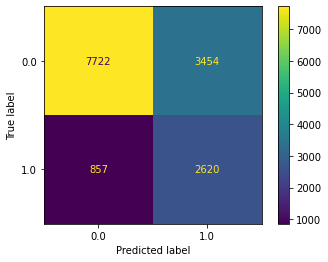

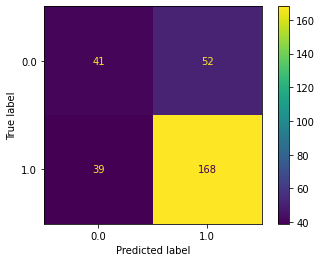

In [24]:
#Confusion Matrices
'''NOTE: THERE MIGHT BE A PROBLEM DUE TO CHANGING CLASS LABELS DURING THE PROCESS'''
#Adult
cm_a = confusion_matrix(adult_orig_test.labels, a_testset_pred_trans.labels)

disp_a = ConfusionMatrixDisplay(confusion_matrix=cm_a,
                              display_labels=trans_lr_a.classes_)
disp_a.plot() 

#German
cm_g = confusion_matrix(german_orig_test.labels, g_testset_pred_trans.labels)

disp_g = ConfusionMatrixDisplay(confusion_matrix=cm_g,
                              display_labels=trans_lr_g.classes_)
disp_g.plot() 